In [1]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it

In [4]:
world = World(state_size = 10, time = 200, agent=["model_alt", "model_alt"], memory=[1, 1], behav_control=[1, 1], model_var=[0,0])
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

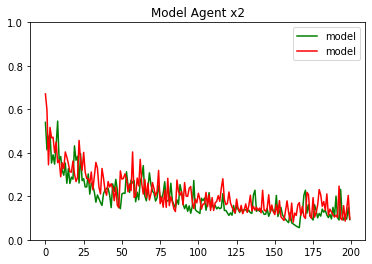

In [5]:
plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Model Agent x2")
plt.show()